In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM_continuous
%store -r Y_motion_CoM_continuous
print(X_motion_CoM_continuous.shape)
print(Y_motion_CoM_continuous.shape)

(21421, 25)
(21421, 2)


In [6]:
X_motion_CoM_continuous[0]

array([0.1, 0.0, 0.0, 0.028489577089618634, -0.029145302018442662,
       0.022371074929438357, -0.0008381898040188694, 0.0231294258002537,
       0.009549917970638715, 0.223, 0.173, -0.41, 0.24, -0.166, -0.41,
       -0.237, 0.166, -0.413, -0.254, -0.16, -0.413, False, True, True,
       False], dtype=object)

In [7]:
Y_motion_CoM_continuous[0]

array([0.006780646577309566, 0.0017755153220013614], dtype=object)

# Multivariate Linear Regression (CoM Prediction)

In [8]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Predict CoM (x) movement

In [9]:
X_motion_CoM_continuous[0, :]

array([0.1, 0.0, 0.0, 0.028489577089618634, -0.029145302018442662,
       0.022371074929438357, -0.0008381898040188694, 0.0231294258002537,
       0.009549917970638715, 0.223, 0.173, -0.41, 0.24, -0.166, -0.41,
       -0.237, 0.166, -0.413, -0.254, -0.16, -0.413, False, True, True,
       False], dtype=object)

In [10]:
Y_motion_CoM_continuous[0, :]

array([0.006780646577309566, 0.0017755153220013614], dtype=object)

### Linear Regression

In [15]:
# Input
#X = np.hstack((X_motion_CoM_continuous[:, :3], # motion command
#               X_motion_CoM_continuous[:, 3:9], # state
#               X_motion_CoM_continuous[:, 9:11], # FL (x,y) position
#               X_motion_CoM_continuous[:, 12:14])) # FR (x,y) position

# Input
X = np.hstack((X_motion_CoM_continuous[:, :3], # motion command
               #X_motion_CoM_continuous[:, 3:9], # state
               X_motion_CoM_continuous[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous[:, 18:20], # RR (x,y) position
               X_motion_CoM_continuous[:, 21:23])) # Which feet are moving

# Labels
Y = np.array([Y_motion_CoM_continuous[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_x = LinearRegression()

# Fit the model
model_fr_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9729750309512984
RMSE:  0.0036536855177992547
The lowest error is:  1.617718019986114e-06
The highest error is:  0.05332739240751039
The avg. error is:  0.0023614145377671455


In [16]:
model_fr_com_x.coef_

array([[ 1.57780279e-01,  6.70203026e-03, -1.87793483e-02,
         1.64672413e-01, -8.63580126e-03, -5.52508964e-02,
         8.14657476e-03, -4.41137428e-02, -3.67723357e-03,
        -2.54464365e-01, -1.42715402e-01, -1.80895513e+10,
        -1.80895513e+10]])

In [17]:
model_fr_com_x.intercept_

array([1.80895513e+10])

Text(0, 0.5, 'Predictions')

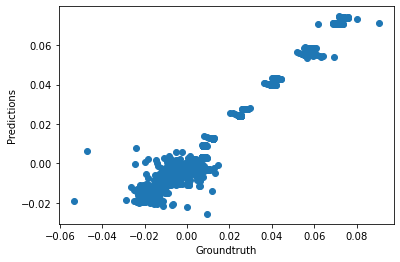

In [18]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [19]:
#%store model_fr_com_x

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Command: {X_test[idx, :3]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [21]:
# Save model
#joblib.dump(model_fr_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_x.sav")

## Predict FR foot -> y

### Linear Regression

In [38]:
# Input
#X = np.hstack((X_motion_CoM_continuous[:, :3], # motion command
#               X_motion_CoM_continuous[:, 3:9], # state
#               X_motion_CoM_continuous[:, 9:11], # FL (x,y) position
#               X_motion_CoM_continuous[:, 12:14])) # FR (x,y) position

# Input
X = np.hstack((X_motion_CoM_continuous[:, :3], # motion command
               X_motion_CoM_continuous[:, 3:9], # state
               X_motion_CoM_continuous[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_continuous[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_y = LinearRegression()

# Fit the model
model_fr_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9982863871886005
RMSE:  0.002019092408860186
The lowest error is:  5.032002133933955e-07
The highest error is:  0.04258838948617594
The avg. error is:  0.0010209612971151035


In [39]:
model_fr_com_y.coef_

array([[ 5.10382744e-02,  1.61845512e-01,  1.49362908e-01,
        -8.91380327e-04,  6.33026478e-04, -2.04900294e-03,
        -2.79636904e-04, -2.70987453e-03,  6.06837929e-03,
        -8.23380669e-02,  1.54365720e-01, -1.50323188e-01,
         1.33308224e-03, -3.76815427e-01,  2.20008477e-01,
         8.51048521e-02,  3.47199432e-01]])

In [40]:
model_fr_com_y.intercept_

array([-0.02292272])

Text(0, 0.5, 'Predictions')

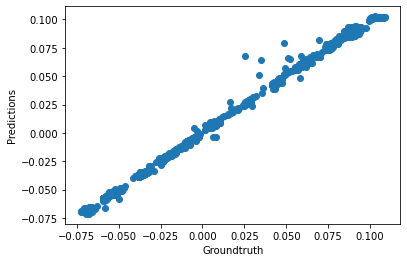

In [41]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [26]:
#%store model_fr_com_y

In [27]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [28]:
# Save model
#joblib.dump(model_fr_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_y.sav")